In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 3

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 1,103
Trainable params: 1,103
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/13 [=>............................] - ETA: 1s - loss: 1.1590 - accuracy: 0.3516

2023-07-15 16:17:41.487920: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz



Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 7ms/step - loss: 1.1054 - accuracy: 0.4109 - val_loss: 1.0209 - val_accuracy: 0.4728
Epoch 2/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.1233 - accuracy: 0.4297
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 1.0549 - accuracy: 0.4447 - val_loss: 1.0004 - val_accuracy: 0.4710
Epoch 3/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.0651 - accuracy: 0.4453
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 1.0190 - accuracy: 0.4647 - val_loss: 0.9670 - val_accuracy: 0.4946
Epoch 4/1000
 1/13 [=>............................] - ETA: 0s - loss: 1.0064 - accuracy: 0.5000
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [=============

13/13 [==============================] - 0s 2ms/step - loss: 0.5589 - accuracy: 0.7650 - val_loss: 0.3234 - val_accuracy: 0.8732
Epoch 29/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.5560 - accuracy: 0.7656
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 0.5302 - accuracy: 0.7782 - val_loss: 0.3021 - val_accuracy: 0.9149
Epoch 30/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.4980 - accuracy: 0.7969
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7674 - val_loss: 0.2865 - val_accuracy: 0.9420
Epoch 31/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.6207 - accuracy: 0.7109
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 0.5519 - accuracy: 0.7674 - va

Epoch 56/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.3903 - accuracy: 0.8750
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 0.3829 - accuracy: 0.8502 - val_loss: 0.1218 - val_accuracy: 0.9819
Epoch 57/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.3739 - accuracy: 0.8438
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.8459 - val_loss: 0.1173 - val_accuracy: 0.9891
Epoch 58/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.5111 - accuracy: 0.7891
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8411 - val_loss: 0.1150 - val_accuracy: 0.9891
Epoch 59/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.4365 - accuracy: 0

 1/13 [=>............................] - ETA: 0s - loss: 0.4426 - accuracy: 0.8125
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8556 - val_loss: 0.0895 - val_accuracy: 0.9891
Epoch 84/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.2867 - accuracy: 0.8906
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.8846 - val_loss: 0.0832 - val_accuracy: 0.9891
Epoch 85/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.3526 - accuracy: 0.8594
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 0.3183 - accuracy: 0.8755 - val_loss: 0.0817 - val_accuracy: 0.9891
Epoch 86/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.2896 - accuracy: 0.8828
Epoch 86

 1/13 [=>............................] - ETA: 0s - loss: 0.2836 - accuracy: 0.8906
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8677 - val_loss: 0.0718 - val_accuracy: 0.9909
Epoch 111/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.2508 - accuracy: 0.8984
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 0.3031 - accuracy: 0.8937 - val_loss: 0.0720 - val_accuracy: 0.9909
Epoch 112/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.3609 - accuracy: 0.8516
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 0.2823 - accuracy: 0.8900 - val_loss: 0.0697 - val_accuracy: 0.9909
Epoch 113/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.3067 - accuracy: 0.8906
Ep

Epoch 137/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.3106 - accuracy: 0.8984
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8804 - val_loss: 0.0715 - val_accuracy: 0.9891
Epoch 138/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.3609 - accuracy: 0.8594
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 0.2931 - accuracy: 0.8918 - val_loss: 0.0710 - val_accuracy: 0.9909
Epoch 139/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.3579 - accuracy: 0.8828
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 0.2874 - accuracy: 0.8985 - val_loss: 0.0705 - val_accuracy: 0.9909
Epoch 140/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.2314 - accu

Epoch 164/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.3063 - accuracy: 0.8906
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 0.2766 - accuracy: 0.9003 - val_loss: 0.0653 - val_accuracy: 0.9909
Epoch 165/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.2253 - accuracy: 0.9141
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.9106 - val_loss: 0.0645 - val_accuracy: 0.9891
Epoch 166/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.2426 - accuracy: 0.9219
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
13/13 [==============================] - 0s 2ms/step - loss: 0.2728 - accuracy: 0.9112 - val_loss: 0.0613 - val_accuracy: 0.9928
Epoch 167/1000
 1/13 [=>............................] - ETA: 0s - loss: 0.2019 - accu

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

5/5 [==============================] - 0s 528us/step - loss: 0.0693 - accuracy: 0.9891


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 31ms/step
[0.00421215 0.10208443 0.89370346]
2


# 混同行列

18/18 [==============================] - 0s 308us/step


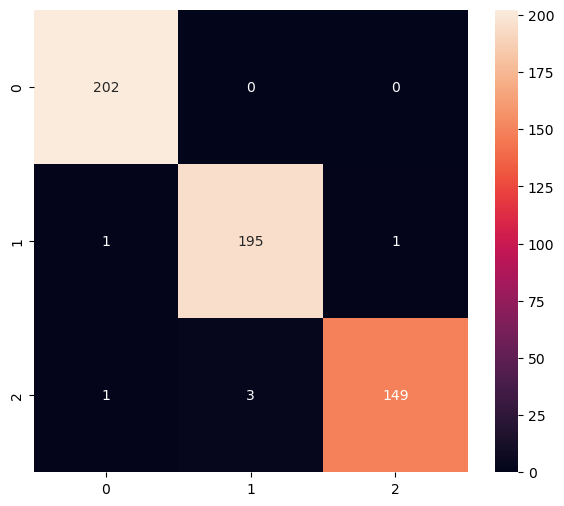

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       202
           1       0.98      0.99      0.99       197
           2       0.99      0.97      0.98       153

    accuracy                           0.99       552
   macro avg       0.99      0.99      0.99       552
weighted avg       0.99      0.99      0.99       552



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/gf/vqbgrt4s6n12hhx9nykkb_dc0000gn/T/tmp2a3uqjmu/assets


2023-07-15 16:17:47.196800: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-07-15 16:17:47.196821: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-07-15 16:17:47.197421: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/gf/vqbgrt4s6n12hhx9nykkb_dc0000gn/T/tmp2a3uqjmu
2023-07-15 16:17:47.198941: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-07-15 16:17:47.198949: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/gf/vqbgrt4s6n12hhx9nykkb_dc0000gn/T/tmp2a3uqjmu
2023-07-15 16:17:47.201356: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2023-07-15 16:17:47.201867: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-07-15 16:17:47.226830: I tensorflow/cc/saved_model/loader.

6500

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Initialized TensorFlow Lite runtime.
INFO: Applying 1 TensorFlow Lite delegate(s) lazily.


In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 229 µs, sys: 749 µs, total: 978 µs
Wall time: 945 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.00421215 0.10208449 0.89370334]
2
